In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

- Бере твою модель

    (типу: "Ось Random Forest, зроби магію")
- Ділить навчальні дані на порції

    Наприклад: 10%, 20%, …, 100% (ти вирішуєш через train_sizes)
- Для кожної порції:

    Вона навчає модель на цій порції.
- Потім оцінює якість:

    на тій же порції (training score)
    на крос-валідації (test score / validation score)
- Повертає:

    Розміри порцій (train_sizes)
    Метрики якості на train і validation для кожної порції

In [2]:
X, y = load_breast_cancer(return_X_y=True)

In [3]:
model = RandomForestClassifier(random_state=42)

In [6]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=StratifiedKFold(n_splits=5),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

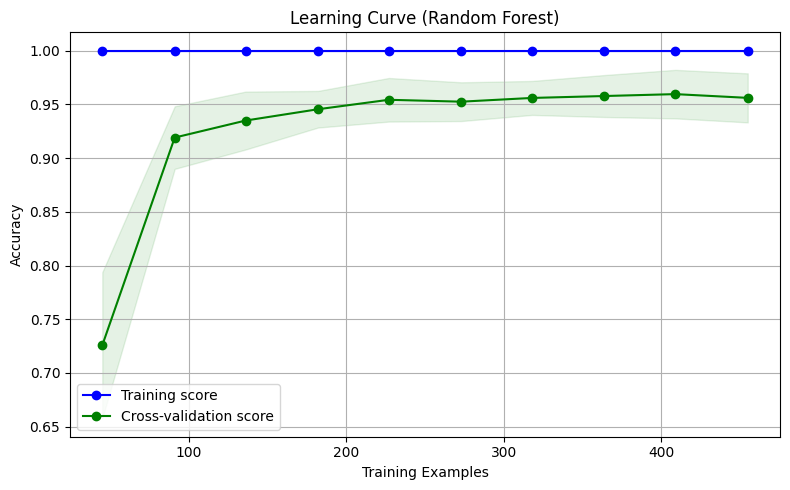

In [7]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

- Якщо training score високий, а validation — низький, модель переобучилась (overfitting).
- Якщо обидва низькі — модель недоучилась (underfitting).
- Якщо validation score росте і стабілізується — все йде добре